In [1]:
import sys
sys.path.append("../MILESTONE1")
from file import df_suffle

Image mode (Channel Code) RGB
Image_size(Pixels) (2480, 3508)
DPI (301.0, 301.0)


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model


In [3]:
train_df, val_df = train_test_split(
    df_suffle,
    test_size=0.2,
    random_state=42,
    stratify=df_suffle['Brand']
)


In [4]:
IMG_SIZE = 224
BATCH_SIZE = 16

train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=3,
    brightness_range=[0.9, 1.1]
)

val_data = ImageDataGenerator(
    rescale=1./255
)


In [5]:
train_generator = train_data.flow_from_dataframe(
    train_df,
    x_col="Image",
    y_col="Brand",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_generator = val_data.flow_from_dataframe(
    val_df,
    x_col="Image",
    y_col="Brand",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    shuffle=False
)



Found 400 validated image filenames belonging to 3 classes.
Found 100 validated image filenames belonging to 3 classes.


In [6]:
base_model=MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE,IMG_SIZE,3)
)

base_model.trainable=False
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.5)(x)
output=Dense(3,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=output)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20


c:\Users\Yatendra Pachori\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.3475 - loss: 1.3216 - val_accuracy: 0.5200 - val_loss: 0.9096
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 909ms/step - accuracy: 0.5140 - loss: 1.0011 - val_accuracy: 0.6400 - val_loss: 0.8070
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 941ms/step - accuracy: 0.5244 - loss: 0.9574 - val_accuracy: 0.6800 - val_loss: 0.7216
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 957ms/step - accuracy: 0.5744 - loss: 0.7938 - val_accuracy: 0.7100 - val_loss: 0.6640
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 975ms/step - accuracy: 0.6971 - loss: 0.6833 - val_accuracy: 0.7200 - val_loss: 0.6431
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 961ms/step - accuracy: 0.6268 - loss: 0.7215 - val_accuracy: 0.7100 - val_loss: 0.5995
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 915ms/step - accuracy: 0.6827 - loss: 0.6574 - val_accuracy: 0.7600 - val_loss: 0.6094
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 973ms/step - accuracy: 0.6334 - loss: 0.7337 - val_accuracy: 0.7500 

In [11]:
train_df,temp_df=train_test_split(
    df_suffle,
    test_size=0.4,         
    stratify=df_suffle['Brand'],
    random_state=42
)

val_df,test_df= train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['Brand'],
    random_state=42
)

In [ ]:
test_generator=val_data.flow_from_dataframe(
    test_df,
    x_col="Image",
    y_col="Brand",
    target_size=(224,224),
    color_mode="rgb",
    batch_size=16,
    shuffle=False
)


Found 100 validated image filenames belonging to 3 classes.


In [13]:
test_loss,test_accuracy=model.evaluate(test_generator)
print("test_accuracy",test_accuracy)

c:\Users\Yatendra Pachori\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8025 - loss: 0.4539
test_accuracy 0.8100000023841858


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_true=val_generator.classes
y_pred=np.argmax(model.predict(val_generator),axis=1)

print(classification_report(
    y_true,
    y_pred,
    target_names=val_generator.class_indices.keys()
))

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step
              precision    recall  f1-score   support

       canon       0.77      0.90      0.83        40
       epson       0.93      0.62      0.75        40
          hp       0.77      1.00      0.87        20

    accuracy                           0.81       100
   macro avg       0.82      0.84      0.81       100
weighted avg       0.83      0.81      0.80       100



<Axes: >

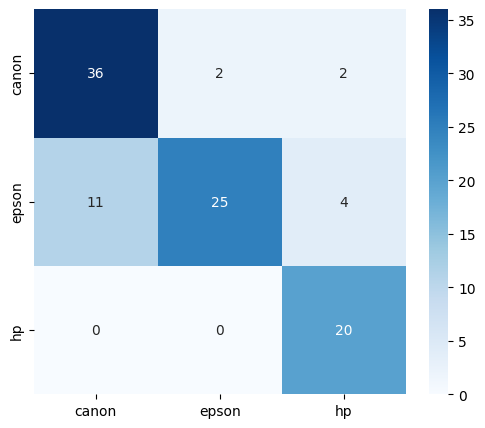

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=val_generator.class_indices.keys(),
    yticklabels=val_generator.class_indices.keys()
)
